#**Task 1: Reduce the Number of Intensity Levels in an Image**

##**Objective**
Reduce the number of intensity levels (gray levels) in an image from 256 to a user-specified value (an integer power of 2).

##**Step-by-Step Instructions**

1. Load a grayscale image.
2. Ask the user for the desired number of intensity levels (e.g., 2, 4, 8, 16, etc.).
3. Quantize the image to the specified number of levels.
4. Display the original and quantized images.

##**Explanation**
The code divides the original intensity range into equal segments and maps each pixel to the nearest lower segment value, effectively reducing the number of gray levels.


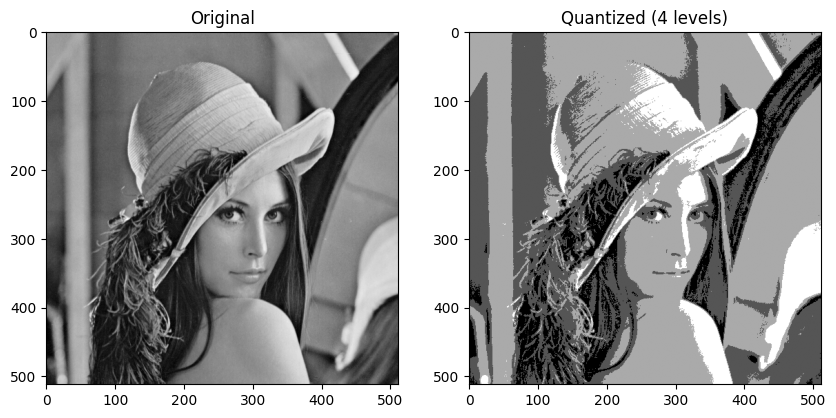

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Download the image from the URL
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

# # Load a grayscale image
# img = cv2.imread('sample_data/lenna.png', cv2.IMREAD_GRAYSCALE)

# User input: number of intensity levels (must be a power of 2)
levels = 4  # Example: 4 levels

# Calculate quantization step
step = 256 // levels

# Quantize the image
quantized_img = (img // step) * step
quantized_img = np.clip(quantized_img, 0, 255).astype(np.uint8)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title(f'Quantized ({levels} levels)')
plt.imshow(quantized_img, cmap='gray')
plt.show()


#**Task 2: Spatial Averaging (Smoothing) with Different Neighborhoods**

##**Objective**
Apply spatial averaging (mean filtering) to an image using 3x3, 10x10, and 20x20 neighborhoods.

##**Step-by-Step Instructions**
1. Load the image.
2. For each kernel size (3x3, 10x10, 20x20), apply a mean filter.
3. Display the results for comparison.

##**Explanation**
Larger kernels produce stronger smoothing, blurring more details in the image.

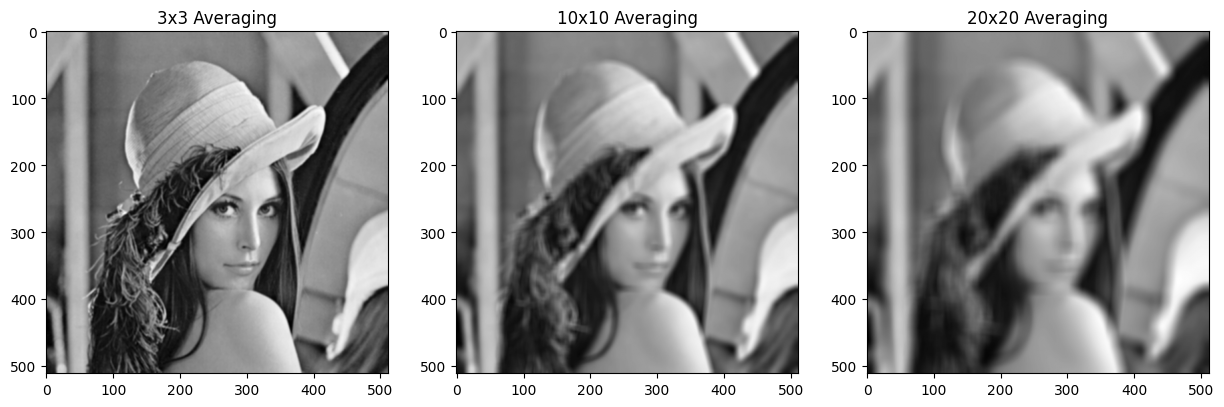

In [14]:
# Define kernel sizes
kernel_sizes = [3, 10, 20]
smoothed_imgs = []

for k in kernel_sizes:
    smoothed = cv2.blur(img, (k, k))
    smoothed_imgs.append(smoothed)

# Display images
plt.figure(figsize=(15,5))
for i, (k, smoothed) in enumerate(zip(kernel_sizes, smoothed_imgs)):
    plt.subplot(1,3,i+1)
    plt.title(f'{k}x{k} Averaging')
    plt.imshow(smoothed, cmap='gray')
plt.show()

#**Task 3: Rotate an Image by 45 and 90 Degrees**

##**Objective**
Rotate the input image by 45° and 90°.

##**Step-by-Step Instructions**
1. Load the image.
2. Compute the rotation matrix for the desired angle.
3. Apply the rotation using affine transformation.
4. Display the rotated images.

##**Explanation**
The function rotates the image about its center using OpenCV's affine transformation.

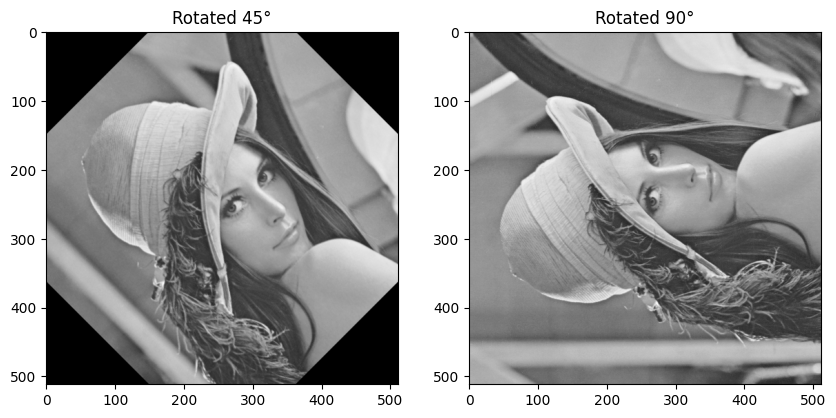

In [15]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

rotated_45 = rotate_image(img, 45)
rotated_90 = rotate_image(img, 90)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Rotated 45°')
plt.imshow(rotated_45, cmap='gray')
plt.subplot(1,2,2)
plt.title('Rotated 90°')
plt.imshow(rotated_90, cmap='gray')
plt.show()

#**Task 4: Blockwise Averaging (Spatial Resolution Reduction)**

##**Objective**
For every non-overlapping block (3x3, 5x5, 7x7), replace all pixels in the block with their average value, simulating spatial resolution reduction.

##**Step-by-Step Instructions**
For each block size, process the image in non-overlapping blocks.
Compute the average for each block and assign it to all pixels in that block.
Display the results.

##**Explanation**
This process simulates downsampling by replacing each block with its mean, reducing spatial detail.

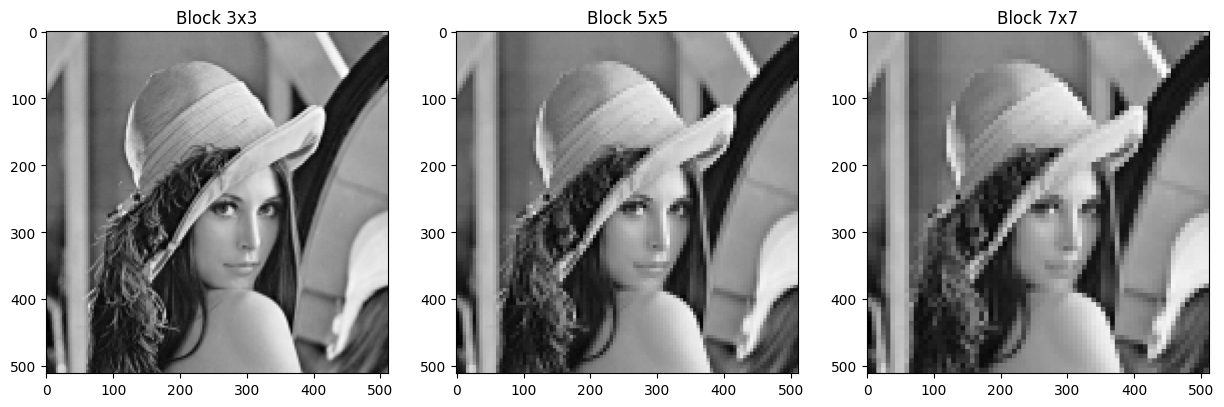

In [16]:
def blockwise_average(image, block_size):
    img_copy = image.copy()
    h, w = image.shape
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img_copy[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.float32)
            img_copy[i:i+block_size, j:j+block_size] = avg
    return img_copy.astype(np.uint8)

block_sizes = [3, 5, 7]
plt.figure(figsize=(15,5))
for i, b in enumerate(block_sizes):
    reduced = blockwise_average(img, b)
    plt.subplot(1,3,i+1)
    plt.title(f'Block {b}x{b}')
    plt.imshow(reduced, cmap='gray')
plt.show()